In [1]:
pip install geopandas shapely fiona pyproj rasterio folium



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 268.7 kB/s eta 0:00:05
   ------------ --------------------------- 0.5/1.7 MB 268.7 kB/s eta 0:00:05
   ------------ --------------------------- 0.5/1.7 MB 268.7 kB/s eta 0:00:05
   ---

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
data_path = r'C:\Users\HP\Documents\Geospatial Projects\US_POP_ChoroplethMap\NST-EST2024-POPCHG2020-2024.csv'
shape_path = r'C:\Users\HP\Documents\Geospatial Projects\US_POP_ChoroplethMap\cb_2018_us_state_500k.shp'

In [4]:
df = pd.read_csv(data_path)
df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,NRANK_NPCHG2020,NRANK_NPCHG2021,NRANK_NPCHG2022,NRANK_NPCHG2023,NRANK_NPCHG2024,NRANK_PPCHG2020,NRANK_PPCHG2021,NRANK_PPCHG2022,NRANK_PPCHG2023,NRANK_PPCHG2024
0,10,0,0,0,United States,331515736,331577720,332099760,334017321,336806231,...,X,X,X,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,57617706,57431458,57252533,57159597,57398303,...,4,4,4,4,3,4,4,4,3,3
2,30,1,1,0,New England,15122011,15057350,15118145,15175633,15263573,...,8,4,5,9,9,9,4,5,5,4
3,30,1,2,0,Middle Atlantic,42495695,42374108,42134388,41983964,42134730,...,9,8,9,6,5,8,8,9,7,6
4,20,2,0,0,Midwest Region,68998970,68984258,68872831,68903297,69186401,...,3,3,3,3,4,3,3,3,4,4


In [5]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'ESTIMATESBASE2020',
       'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'POPESTIMATE2023', 'POPESTIMATE2024', 'NPOPCHG_2020', 'NPOPCHG_2021',
       'NPOPCHG_2022', 'NPOPCHG_2023', 'NPOPCHG_2024', 'PPOPCHG_2020',
       'PPOPCHG_2021', 'PPOPCHG_2022', 'PPOPCHG_2023', 'PPOPCHG_2024',
       'NRANK_ESTBASE2020', 'NRANK_POPEST2020', 'NRANK_POPEST2021',
       'NRANK_POPEST2022', 'NRANK_POPEST2023', 'NRANK_POPEST2024',
       'NRANK_NPCHG2020', 'NRANK_NPCHG2021', 'NRANK_NPCHG2022',
       'NRANK_NPCHG2023', 'NRANK_NPCHG2024', 'NRANK_PPCHG2020',
       'NRANK_PPCHG2021', 'NRANK_PPCHG2022', 'NRANK_PPCHG2023',
       'NRANK_PPCHG2024'],
      dtype='object')

In [6]:
# Select only the desired columns by filtering it and we will name it df2
df2= df[['NAME', 'POPESTIMATE2023', 'POPESTIMATE2024']]

# Display the result
print(df2.head())


               NAME  POPESTIMATE2023  POPESTIMATE2024
0     United States        336806231        340110988
1  Northeast Region         57398303         57832935
2       New England         15263573         15386085
3   Middle Atlantic         42134730         42446850
4    Midwest Region         69186401         69596584


In [7]:
# lets rename the column 'NAME' to 'STATE'

df2 = df2.rename(columns={'NAME': 'STATE'})


In [8]:
df2

,STATE,POPESTIMATE2023,POPESTIMATE2024
0,United States,336806231,340110988
1,Northeast Region,57398303,57832935
2,New England,15263573,15386085
3,Middle Atlantic,42134730,42446850
4,Midwest Region,69186401,69596584
...,...,...,...
61,Washington,7857320,7958180
62,West Virginia,1770495,1769979
63,Wisconsin,5930405,5960975
64,Wyoming,585067,587618


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATE            66 non-null     object
 1   POPESTIMATE2023  66 non-null     int64 
 2   POPESTIMATE2024  66 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [10]:
# lets get population change 

df2['POPCHANGE'] = df2['POPESTIMATE2024'] - df2['POPESTIMATE2023']
df2['POPCHANGE_PERC'] = ((df2['POPESTIMATE2024'] - df2['POPESTIMATE2023']) / df2['POPESTIMATE2023']) * 100

In [11]:
df2.head(10)

,STATE,POPESTIMATE2023,POPESTIMATE2024,POPCHANGE,POPCHANGE_PERC
0,United States,336806231,340110988,3304757,0.981204
1,Northeast Region,57398303,57832935,434632,0.757221
2,New England,15263573,15386085,122512,0.802643
3,Middle Atlantic,42134730,42446850,312120,0.740767
4,Midwest Region,69186401,69596584,410183,0.592867
5,East North Central,47360185,47619171,258986,0.546843
6,West North Central,21826216,21977413,151197,0.692731
7,South Region,130893358,132665693,1772335,1.354030
8,South Atlantic,68684308,69676509,992201,1.444582
9,East South Central,19759744,19916866,157122,0.795162


In [12]:
# bring in the shapefile

shapefile = gpd.read_file(shape_path)
shapefile

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [13]:
# lets merge the attibute on shapefile with that on dataframe(DF2)


shapefile = gpd.read_file(shape_path)
shapefile = pd.merge(
            left = shapefile,
            right =  df2,
            left_on = 'NAME',
            right_on = 'STATE',
            how = 'left'
)

In [14]:
shapefile.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STATE', 'POPESTIMATE2023',
       'POPESTIMATE2024', 'POPCHANGE', 'POPCHANGE_PERC'],
      dtype='object')

In [15]:
# remove rows with missing data

shapefile = shapefile.dropna()

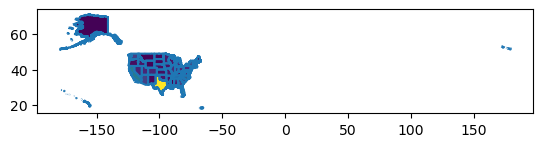

In [16]:
# visualize the data 

ax = shapefile.boundary.plot()
shapefile.plot(ax=ax, column='POPCHANGE')
plt.show()

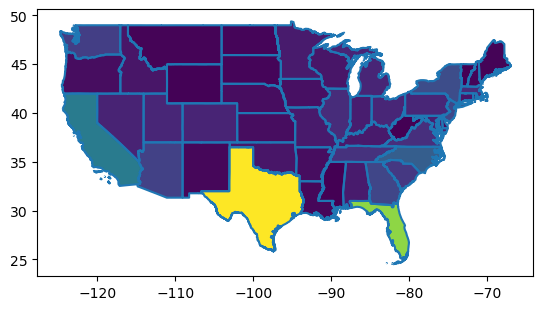

In [17]:
# to get a better view lets exclude some areas 

shapefile = shapefile[~shapefile['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]


ax = shapefile.boundary.plot()
shapefile.plot(ax=ax, column='POPCHANGE')
plt.show()

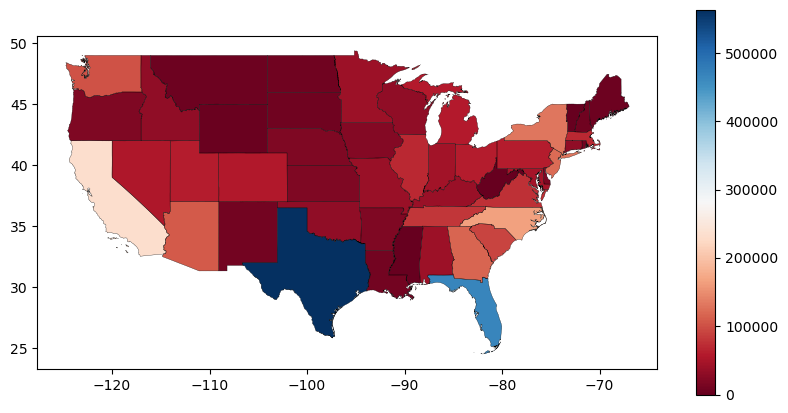

In [18]:
ax = shapefile.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10,5))
shapefile.plot(ax=ax, column='POPCHANGE', legend=True, cmap='RdBu')
plt.show()


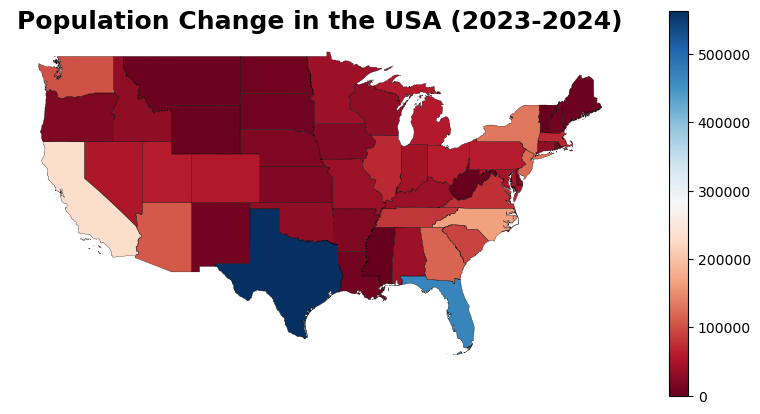

In [21]:
# FURTHER STYLING OF THE MAP


ax = shapefile.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10,5))
shapefile.plot(ax=ax, column='POPCHANGE', legend=True, cmap='RdBu')



# to get rid of the outside labels on the graph 
ax.get_xaxis().set_visible(False)    # for x axis
ax.get_yaxis().set_visible(False)    # for y axis

for edge in ['left', 'right', 'top', 'bottom']:
    ax.spines[edge].set_visible(False)


ax.set_title('Population Change in the USA (2023-2024)', size=18, weight='bold')
plt.show()